In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Для воспроизводимости результатов зафиксируем random seed

In [2]:
np.random.seed(92)

### Задача
Представленный ниже код апроксимирует зашумленную функцию $y = 3.5x - 7.3$

In [3]:
def func(x):
    return 3.5 * x - 7.3

Определим наборы данных

In [4]:
dataset_len = 30

X = np.linspace(dataset_len / -2, dataset_len / 2, dataset_len)
noise = np.random.randn(dataset_len)
Y = func(X) + noise

Для достижения большей репрезентативности выборок берется каждое 3 значение

In [5]:
x_train, x_val, x_test = X[0::3], X[1::3], X[2::3]
y_train, y_val, y_test = Y[0::3], Y[1::3], Y[2::3]

Перемешаем каждый набор данных

In [6]:
train_indexes = np.random.permutation(x_train.shape[0])
val_indexes = np.random.permutation(x_val.shape[0])
test_indexes = np.random.permutation(x_test.shape[0])

x_train, y_train = x_train[train_indexes], y_train[train_indexes]
x_val, y_val = x_val[val_indexes], y_val[val_indexes]
x_test, y_test = x_test[test_indexes], y_test[test_indexes]

На графике приближаемая функция выглядит следующим образом:

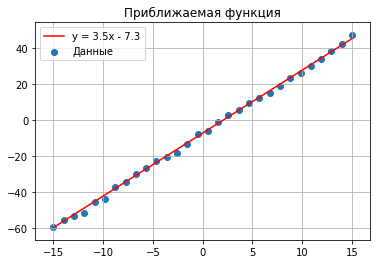

In [19]:
plt.plot(X, func(X), 'r', label='y = 3.5x - 7.3')
plt.scatter(X, Y, label='Данные')
plt.title('Приближаемая функция')
plt.legend()
plt.grid()

### Функция ошибок

В качестве loss-функции используется MSE

$$MSE = \frac{1}{n} * \sum_{i=1}^n (y_{pred}(i) - y_{expected}(i))^2 $$

In [8]:
def MSE(y_predicted, y_expected):
    return np.square(y_predicted - y_expected).mean()

Значение loss-функции между "чистыми" и зашумленными данными

In [9]:
MSE(func(X), Y)

0.9745288160360759

Приближаемая функция имеет вид $y = wx + b$

Определим оптимизируемые параметры

In [10]:
input_size = 1

In [11]:
w = np.random.randn(input_size, 1)
b = np.random.randn(1)

w, b

(array([[0.25119467]]), array([0.28985376]))

### Функция прямого распространения

Определим функцию, выполняющую вычисление при текущем наборе параметров

In [12]:
def predict(x):
    x = np.array(x).reshape(-1, input_size)
    result = x @ w + b
    return result.reshape(-1, 1)

In [13]:
predict(X[0])

array([[-3.47806635]])

## Метод наименьших квадратов

### Коэффициент корреляции Пирсона
$$r_{xy} = \frac{cov_{XY}}{\sigma{X} * \sigma{Y}}$$

$$r_{xy} = \frac{\sum_{i=0}^n(X_i - \overline{X})(Y_i - \overline{Y})}{\sqrt{\sum_i^n (X_i - \overline{X})^2} * \sqrt{\sum_i^n (Y_i - \overline{Y})^2}}$$

### Веса модели

$$w = \frac{\sigma{Y}}{\sigma{X}} * r_{xy}$$

$$w = \frac{\sigma{Y}}{\sigma{X}} * \frac{cov_{XY}}{\sigma{X} * \sigma{Y}}$$

$$w = \frac{cov_{XY}}{(\sigma{X})^2}$$

$$b = \overline{Y} - w * \overline{X}$$

In [14]:
corrcoef = np.corrcoef(x_train, y_train)[1][0]
corrcoef

0.9994109241147924

In [15]:
w = np.std(y_train, ddof=1) / np.std(x_train, ddof=1) * corrcoef
w = w.reshape(input_size, 1)
w

array([[3.50438672]])

In [16]:
b = y_train.mean() - w * x_train.mean()
b

array([[-7.80364749]])

### Визуализация результатов

Сравним значения приближаемой и полученной в результате применения метода наименьших квадратов моделей

In [17]:
expected_model_prediction = func(x_test)
actual_model_prediction = predict(x_test).reshape(-1)

expected_model_loss = MSE(expected_model_prediction, y_test)
actual_model_loss = MSE(actual_model_prediction, y_test)

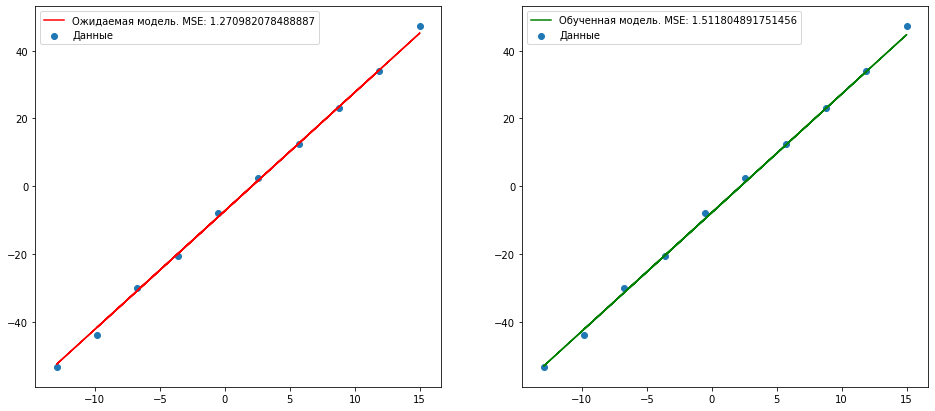

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

ax[0].plot(x_test, expected_model_prediction, 'r', label=f'Ожидаемая модель. MSE: {expected_model_loss}')
ax[0].scatter(x_test, y_test, label='Данные')
ax[0].legend()

ax[1].plot(x_test, actual_model_prediction, 'g', label=f'Обученная модель. MSE: {actual_model_loss}')
ax[1].scatter(x_test, y_test, label='Данные')
ax[1].legend()

plt.show()